In [1]:
pip install np_utils

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries# Impor 
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras

from keras.utils.np_utils import to_categorical

from keras import backend as K

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D,BatchNormalization, Activation, MaxPooling2D


In [3]:
#Define Datapath
data_path = 'data/folder jaffe/trainj'
data_dir_list = os.listdir(data_path)

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-ANGRY

Loaded the images of dataset-disgust

Loaded the images of dataset-FEAR

Loaded the images of dataset-HAPPY

Loaded the images of dataset-NEUTRAL

Loaded the images of dataset-SAD

Loaded the images of dataset-SURPRISE



(143, 128, 128, 3)

In [4]:


num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:29]=0 #30
labels[30:59]=1 #29
labels[60:92]=2 #32
labels[93:124]=3 #31
labels[125:155]=4 #30
labels[156:187]=5 #31
labels[188:]=6 #30

names = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']

def getLabel(id):
    return ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'][id]



In [5]:
# convert class labels to on-hot encoding# conve 
Y = to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)



In [6]:

# Initialising the CNN
model = Sequential()
input_shape=img_data[0].shape
# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [7]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128, 128, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     204928    
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 128)    512       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 128, 128, 128)     0

True

In [8]:
from keras import callbacks
filename='model_train_new.csv'
filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"
epochs = 30
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [9]:
# Training
hist = model.fit(X_train, y_train,
                 batch_size=7,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(X_test, y_test),
                 callbacks=callbacks_list)

Epoch 1/30
15/15 [==============================] - 145s 9s/step - loss: 1.9388 - accuracy: 0.2700 - val_loss: 1.9350 - val_accuracy: 0.1163
Epoch 2/30
15/15 [==============================] - 144s 10s/step - loss: 1.9228 - accuracy: 0.3400 - val_loss: 1.9258 - val_accuracy: 0.0698
Epoch 3/30
15/15 [==============================] - 130s 9s/step - loss: 1.9073 - accuracy: 0.4100 - val_loss: 1.9186 - val_accuracy: 0.1395
Epoch 4/30
15/15 [==============================] - 136s 9s/step - loss: 1.8948 - accuracy: 0.4100 - val_loss: 1.9087 - val_accuracy: 0.1628
Epoch 5/30
15/15 [==============================] - 125s 8s/step - loss: 1.8807 - accuracy: 0.4100 - val_loss: 1.9013 - val_accuracy: 0.1395
Epoch 6/30
15/15 [==============================] - 118s 8s/step - loss: 1.8668 - accuracy: 0.4900 - val_loss: 1.8949 - val_accuracy: 0.1395
Epoch 7/30
15/15 [==============================] - 133s 9s/step - loss: 1.8526 - accuracy: 0.4400 - val_loss: 1.8896 - val_accuracy: 0.1395
Epoch 8/30
1

<Figure size 432x288 with 0 Axes>

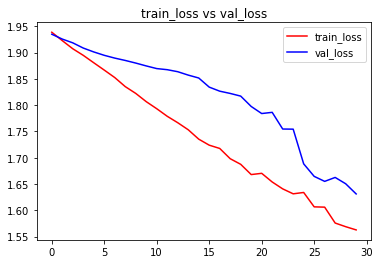

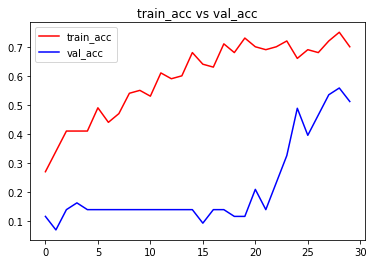

<Figure size 432x288 with 0 Axes>

In [10]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

Test Loss: 1.6311897039413452
Test accuracy: 0.5116279125213623
(1, 128, 128, 3)
[[0.15574601 0.17092821 0.20002566 0.1815628  0.14918979 0.07128271
  0.0712648 ]]
[2]
[[0. 1. 0. 0. 0. 0. 0.]]


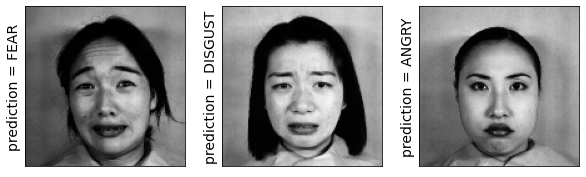

In [21]:
# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
predict_x = model.predict(test_image)
classes_x=np.argmax(predict_x,axis=1)

print (test_image.shape)
print(predict_x)
print(classes_x)
print(y_test[0:1])

res = model.predict(X_test[:3])
res_c = np.argmax(res,axis=1)
plt.figure(figsize=(10, 10))

for i in range(0, 3):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res_c[i]), fontsize=14)
# show the plot
plt.show()

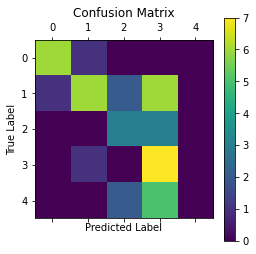

In [22]:
from sklearn.metrics import confusion_matrix
results = model.predict(X_test)
res_cs = np.argmax(results,axis=1)
cm = confusion_matrix(np.where(y_test == 1)[1], res_cs)
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()